# Dealing with Large Raster Files

## Learning objectives
* Name properties of a raster file which influence its file size.
* Explain the term "compression".
* Explain the advantages and disadvantages of the JPEG compression. 
* Discuss different methods for reducing the file size of a raster file along with advantages and disadvantages. 
* Change the file size of a raster file in Python.

## 1. __Recap:__ What do you know about raster files?
Which properties of a raster file influence on its file size?

* Spatial extent
* Number of spectral bands
* __Spatial resolution__
* __Data Type__
* __Compression__

## 2. Raster Data Management
For working with spatial raster data in Python we will use ```rasterio``` and ```numpy```. Numpy will perform all calculations which rasterio takes care of the georeferencing.

In [64]:
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Spatial resolution

#### Exercise 1: 
1. Calculate the number of cells of an array with 100 rows, 200 columns and 5 bands. 
2. Assume each pixel has a resolution of 20 by 20 meters. Increase the resolution to 10 by 10 meters. How many cells does the array contain now? 

In [9]:
os.path.abspath(os.curdir)

'/Users/chludwig/Documents/UniHD/teaching/SS2020/cs4geos/cs4geos20/notebooks'

__Conclusion:__ The memory size of a raster file increases exponentially with an increase in spatial resolution!   (curs of dimensionality? 

### 2.2 Data Types

#### __Recap:__ Which data types do you know?

#### Exercise 2: Converting data types and calculating the memory size. 

#### Exercise 3: Saving memory space by converting float to integer. 

__Conclusion:__ Choosing your data types wisely may reduce the file size to a fraction of the original file.

### 2.3 File Compression

#### __Recap:__ Which raster file types do you know? 

__Conclusion:__ 
* JPEG does not only refer to the file extention. (A .tif file can also be jpeg compressed!)

#### JPEG Compression

We will use subprocess to call gdal tools

In [32]:
import subprocess

#### Exercise 4: Compress the file xxx.tif using the JPEG compression using gdal_translate.  
1. Compare the file size of the original and compresse'd file. What is the compression rate?
2. Load both files into python and compute the pixel-wise difference. What do you observe? 

In [58]:
orginal_file = "../data/dop20_cir_32477_5482_1.tif"
compressed_file = "../data/dop20_cir_32477_5482_1_jpeg_compressed.tif"

In [59]:
with rio.open(orginal_file) as src:
    ndvi_org = src.read(1).astype("float")

In [60]:
with rio.open(compressed_file) as src:
    ndvi_jpeg = src.read(1).astype("float")

In [61]:
np.nanmax(ndvi_jpeg - ndvi_org)

14.0

In [62]:
np.nanmin(ndvi_jpeg - ndvi_org)

-18.0

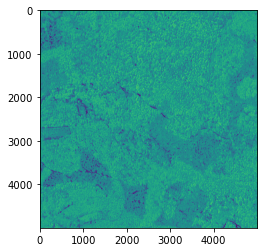

In [66]:
plt.imshow(ndvi_org)

#### JPEG2000 Compression

#### Exercise 5: Perform a lossless compression on xxx.tif.
1. Convert the file xxx.tif to jpeg2000 (file extention .jp2) using gdal_translate. __The compression should be lossless!__ Refer to the [documentation](https://gdal.org/drivers/raster/jp2openjpeg.html) to find all necessary parameters to guarantee a lossless compression. What is the compression rate? 

2. Compare the data values of both original and compressed data sets.

In [50]:
orginal_file = "../data/dop20_cir_32477_5482_1.tif"
compressed_file = "../data/dop20_cir_32477_5482_1.jp2"

In [51]:
with rio.open(orginal_file) as src:
    ndvi_org = src.read(1).astype("float")

In [52]:
with rio.open(compressed_file) as src:
    ndvi_jp2 = src.read(1).astype("float")

In [53]:
np.nanmax(ndvi_jp2 - ndvi_org)

0.0

In [54]:
np.nanmin(ndvi_jp2 - ndvi_org)

0.0

__Conclusion:__ 
* Beware when you use compression to save disk space. While regular JPEG compression is fine to use for images that for display in the internet, it is not suitable for raster data in scientific analyses, since you manipulate the data!
* For scientific data use lossless compression algorithms such as LZW or JPEG2000 with the necessary parameters. 

### References:

https://gis.stackexchange.com/questions/169395/converting-large-jp2-files-using-gdal
        
https://gis.stackexchange.com/questions/230553/merging-all-tiles-from-one-directory-using-gdal

http://erouault.blogspot.com/2014/04/advanced-jpeg-in-tiff-uses-in-gdal.html
